In [1]:
print("Hello World")

Hello World


In [21]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
import cv2


In [2]:
img = cv2.imread("albert-einstein.png", 0) #read in grayscale
print(img.shape)
#cv2.imshow("img", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()
img

(720, 960)


array([[10,  8,  6, ...,  5,  3,  4],
       [ 9,  9,  9, ...,  2,  5,  9],
       [ 8,  9, 10, ...,  7, 10, 12],
       ...,
       [15, 12,  9, ..., 16, 13,  4],
       [ 8,  7,  5, ...,  1,  3,  6],
       [11, 10,  8, ..., 10, 11, 12]], dtype=uint8)

In [3]:
def getTotalSize(thing):
    return thing.shape[0] * thing.shape[1]

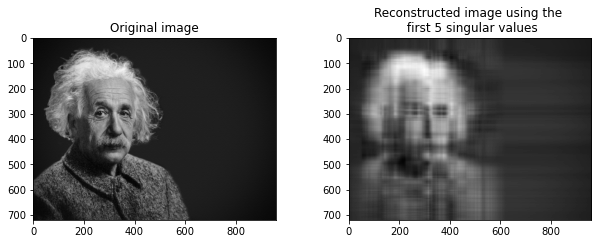


Original Image Size: (720, 960)
Space: 691200
SVD sizes (total): (720, 960)
Space: 2131200
Percent increase or decrease: 208.33333333333334

Compressed Image Size: (720, 960)
U Compressed Dimensions: (720, 5)
Sigma Compressed Dimensions: (5, 5)
VT Compressed Dimensions: (5, 960)
Space: 8425
Percent increase or decrease: -98.78110532407408



In [4]:
# Listing 15

# Reading the image
mat = cv2.imread("albert-einstein.png", 0) # Don't use JPG: mat.shape = (720, 960, 3) | use PNG: 

# SVD 
U, s, VT = LA.svd(mat) # s are only the singular values! You have to make the Sigma matrix yourself!

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 5
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

print()
print("Original Image Size:", mat.shape)
origSpace =  getTotalSize(mat)
print("Space:", origSpace)
print("SVD sizes (total):", (U@Sigma@VT).shape)
svdSpace = getTotalSize(U) + getTotalSize(Sigma) + getTotalSize(VT)
print("Space:", svdSpace)
print("Percent increase or decrease:", ((svdSpace-origSpace)/origSpace) * 100)
print()

print("Compressed Image Size:", mat_approx.shape)
print("U Compressed Dimensions:", U[:, :k].shape)
print("Sigma Compressed Dimensions:", Sigma[:k, :k].shape)
print("VT Compressed Dimensions:", VT[:k, :].shape)
compressedSize = getTotalSize(U[:, :k]) + getTotalSize(Sigma[:k, :k]) + getTotalSize(VT[:k, :])
print("Space:", compressedSize)
print("Percent increase or decrease:", ((compressedSize-origSpace)/origSpace) * 100)
print()

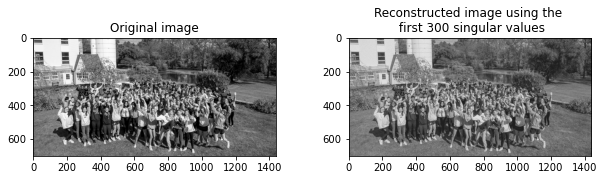


Original Image Size: (700, 1440)
Space: 1008000
SVD sizes (total): (700, 1440)
Space: 3571600
Percent increase or decrease: 254.3253968253968

Compressed Image Size: (700, 1440)
U Compressed Dimensions: (700, 300)
Sigma Compressed Dimensions: (300, 300)
VT Compressed Dimensions: (300, 1440)
Space: 732000
Percent increase or decrease: -27.380952380952383



In [10]:
# Listing 15

# Reading the image
mat = cv2.imread("pingry-hands.png", 0) # Don't use JPG: mat.shape = (720, 960, 3) | use PNG: 

# SVD 
U, s, VT = LA.svd(mat) # s are only the singular values! You have to make the Sigma matrix yourself!

Sigma = np.zeros((mat.shape[0], mat.shape[1]))
Sigma[:min(mat.shape[0], mat.shape[1]), :min(mat.shape[0], mat.shape[1])] = np.diag(s)

# Reconstruction of the matrix using the first 30 singular values
k = 300
mat_approx = U[:, :k] @ Sigma[:k, :k] @ VT[:k, :]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image")

ax2.imshow(mat_approx, cmap='gray')
ax2.set_title("Reconstructed image using the \n first {} singular values".format(k))
plt.show()

print()
print("Original Image Size:", mat.shape)
origSpace =  getTotalSize(mat)
print("Space:", origSpace)
print("SVD sizes (total):", (U@Sigma@VT).shape)
svdSpace = getTotalSize(U) + getTotalSize(Sigma) + getTotalSize(VT)
print("Space:", svdSpace)
print("Percent increase or decrease:", ((svdSpace-origSpace)/origSpace) * 100)
print()

print("Compressed Image Size:", mat_approx.shape)
print("U Compressed Dimensions:", U[:, :k].shape)
print("Sigma Compressed Dimensions:", Sigma[:k, :k].shape)
print("VT Compressed Dimensions:", VT[:k, :].shape)
compressedSize = getTotalSize(U[:, :k]) + getTotalSize(Sigma[:k, :k]) + getTotalSize(VT[:k, :])
print("Space:", compressedSize)
print("Percent increase or decrease:", ((compressedSize-origSpace)/origSpace) * 100)
print()

## Debugging

In [6]:
mat.shape

(720, 960)

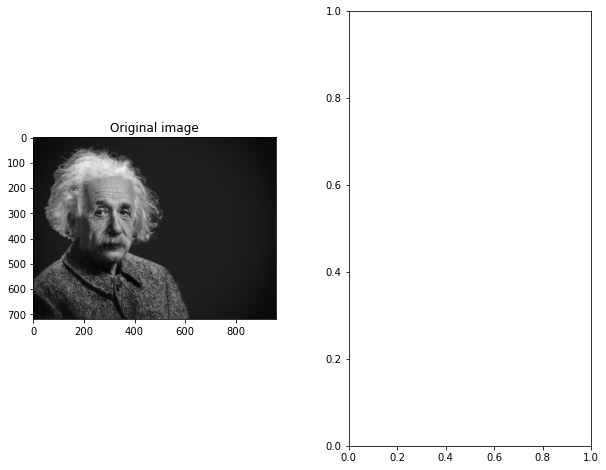

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8))
plt.subplots_adjust(wspace=0.3, hspace=0.2)

ax1.imshow(mat, cmap='gray')
ax1.set_title("Original image")

plt.show()

In [36]:
Sigma

array([[52210.34953332,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 15387.10683645,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 10354.2444358 , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [37]:
s

array([5.22103495e+04, 1.53871068e+04, 1.03542444e+04, 6.72672773e+03,
       5.82131728e+03, 4.41397532e+03, 4.12725773e+03, 3.72327608e+03,
       3.25718404e+03, 2.97096931e+03, 2.78935044e+03, 2.50174561e+03,
       2.45051711e+03, 2.24875247e+03, 2.15874000e+03, 1.97012273e+03,
       1.86921212e+03, 1.83827385e+03, 1.73800511e+03, 1.61274727e+03,
       1.59963786e+03, 1.56328584e+03, 1.53067617e+03, 1.48612089e+03,
       1.44365412e+03, 1.38699514e+03, 1.36105935e+03, 1.32349129e+03,
       1.30481177e+03, 1.28148310e+03, 1.25480758e+03, 1.23383919e+03,
       1.20859830e+03, 1.18844848e+03, 1.15721192e+03, 1.15110830e+03,
       1.13566846e+03, 1.12914723e+03, 1.09964191e+03, 1.09240440e+03,
       1.07167457e+03, 1.04905741e+03, 1.03933487e+03, 1.03524237e+03,
       9.97421895e+02, 9.88790028e+02, 9.87555657e+02, 9.72567842e+02,
       9.64752279e+02, 9.55173200e+02, 9.26279625e+02, 9.20411379e+02,
       9.16029809e+02, 8.93188916e+02, 8.89466484e+02, 8.68876876e+02,
      

In [1]:
#Modified from: https://gist.github.com/reza-bagheri/e144ef6bb20724f0cb5903bacf13a0aa#file-svd_listing15-py